In [37]:
import matplotlib.pyplot as plt
import numpy as np
from termcolor import colored

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import SparseCategoricalAccuracy, Mean

## 1. Noise 추가한 데이터 생성, 기존 방식으로 모델 구축

In [38]:
n_train = 1000

train_x = np.random.normal(0, 1, size=(n_train, 1)).astype(np.float32)
train_x_noise = train_x + 0.2*np.random.normal(0, 1, size=(n_train, 1))

train_y = (train_x_noise > 0).astype(np.int32)

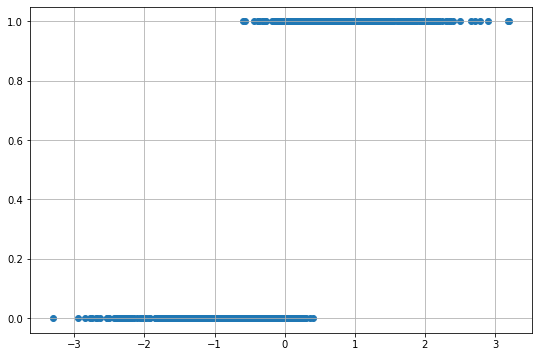

In [39]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(train_x, train_y)
ax.tick_params(labelsize=10)
ax.grid()

In [40]:
train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train_ds = train_ds.shuffle(n_train).batch(8)

In [41]:
model = Sequential()
model.add(Dense(units=2, activation='softmax'))

loss_object = SparseCategoricalCrossentropy()
optimizer = SGD(learning_rate=1)

train_loss = Mean()
train_acc = SparseCategoricalAccuracy()

In [42]:
EPOCHS = 10

for epoch in range(EPOCHS):
    for x, y in train_ds:
        with tf.GradientTape() as tape:
            predictions = model(x)
            loss = loss_object(y, predictions)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        train_loss(loss)
        train_acc(y, predictions)
    print(colored('Epoch: ', 'red', 'on_white'), epoch + 1)
    template = 'Train Loss: {:.4f}\t Train Accuracy: {:.2f}% \n'
    print(template.format(train_loss.result(), train_acc.result()*100))

Epoch:  1
Train Loss: 0.2039	 Train Accuracy: 90.50% 

Epoch:  2
Train Loss: 0.1900	 Train Accuracy: 91.35% 

Epoch:  3
Train Loss: 0.1856	 Train Accuracy: 91.60% 

Epoch:  4
Train Loss: 0.1820	 Train Accuracy: 91.88% 

Epoch:  5
Train Loss: 0.1804	 Train Accuracy: 92.02% 

Epoch:  6
Train Loss: 0.1796	 Train Accuracy: 91.95% 

Epoch:  7
Train Loss: 0.1790	 Train Accuracy: 92.01% 

Epoch:  8
Train Loss: 0.1785	 Train Accuracy: 92.04% 

Epoch:  9
Train Loss: 0.1782	 Train Accuracy: 92.06% 

Epoch:  10
Train Loss: 0.1777	 Train Accuracy: 92.07% 



## 2. train_loss, train_acc에 reset_states() 적용

In [51]:
train_loss = Mean()

loss1 = tf.constant(1)
train_loss(loss1)
print(train_loss.result())

loss2 = tf.constant(2)
train_loss(loss2)
print(train_loss.result())

loss3 = tf.constant(3)
train_loss(loss3)
print(train_loss.result())

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.5, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [55]:
train_loss = Mean()

t1 = tf.constant([1, 2, 3, 4, 5, 6])
for t in t1:
    train_loss(t)
    print(train_loss.result())

print('\n')

# train_loss.reset_states()  
# -> reset_states() 하지 않은 경우, 이전 까지 구한 Mean()에 계속 누적해서 계산하게 된다, 다른 epoch로 넘어갔는데도!
t2 = tf.constant([1, 2, 3, 4, 5, 6])
for t in t2:
    train_loss(t)
    print(train_loss.result())

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.5, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(2.5, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(3.5, shape=(), dtype=float32)


tf.Tensor(3.142857, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(3.1, shape=(), dtype=float32)
tf.Tensor(3.2727273, shape=(), dtype=float32)
tf.Tensor(3.5, shape=(), dtype=float32)


In [56]:
train_loss = Mean()

t1 = tf.constant([1, 2, 3, 4, 5, 6])
for t in t1:
    train_loss(t)
    print(train_loss.result())

print('\n')

train_loss.reset_states()
t2 = tf.constant([1, 2, 3, 4, 5, 6])
for t in t2:
    train_loss(t)
    print(train_loss.result())

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.5, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(2.5, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(3.5, shape=(), dtype=float32)


tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.5, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(2.5, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(3.5, shape=(), dtype=float32)


In [58]:
model = Sequential()
model.add(Dense(units=2, activation='softmax'))

loss_object = SparseCategoricalCrossentropy()
optimizer = SGD(learning_rate=1)

train_loss = Mean()
train_acc = SparseCategoricalAccuracy()

EPOCHS = 10

for epoch in range(EPOCHS):
    for x, y in train_ds:
        with tf.GradientTape() as tape:
            predictions = model(x)
            loss = loss_object(y, predictions)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        train_loss(loss)
        train_acc(y, predictions)
    print(colored('Epoch: ', 'red', 'on_white'), epoch + 1)
    template = 'Train Loss: {:.4f}\t Train Accuracy: {:.2f}% \n'
    print(template.format(train_loss.result(), train_acc.result()*100))

    train_loss.reset_states()   # Epoch를 한 번 돌때마다 reset해 준다
    train_acc.reset_states()

Epoch:  1
Train Loss: 0.2109	 Train Accuracy: 91.90% 

Epoch:  2
Train Loss: 0.1755	 Train Accuracy: 92.40% 

Epoch:  3
Train Loss: 0.1747	 Train Accuracy: 92.50% 

Epoch:  4
Train Loss: 0.1774	 Train Accuracy: 92.00% 

Epoch:  5
Train Loss: 0.1770	 Train Accuracy: 92.10% 

Epoch:  6
Train Loss: 0.1751	 Train Accuracy: 92.00% 

Epoch:  7
Train Loss: 0.1759	 Train Accuracy: 92.50% 

Epoch:  8
Train Loss: 0.1739	 Train Accuracy: 92.80% 

Epoch:  9
Train Loss: 0.1744	 Train Accuracy: 92.40% 

Epoch:  10
Train Loss: 0.1738	 Train Accuracy: 91.30% 

